To fetch GitHub contribution data between particular dates:

```
curl -H "Authorization: bearer {INSERT GH TOKEN HERE}" -X POST -d '{"query":"query {\n user(login:\"kevinpgalligan\") {\n    name\n contributionsCollection(from:\"2022-09-01T00:00:00Z\", to: \"2023-12-30T00:00:00Z\") {\n contributionCalendar { \n colors\n totalContributions\n weeks {\n contributionDays {\n color\n contributionCount\n date\n weekday\n }\n  firstDay\n }\n}\n}\n}\n}"}' https://api.github.com/graphql >contribs-2023-2024.json
```

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.cm

In [2]:
YEARS = [2019, 2020, 2021, 2022]

In [3]:
contribs = []
for year in YEARS:
    with open(f"contribs-{year}-{year+1}.json", "r") as f:
        data = json.load(f)
    calendarCol = data["data"]["user"]["contributionsCollection"]
    weeks = calendarCol["contributionCalendar"]["weeks"]
    for week in weeks:
        for day in week["contributionDays"]:
            contribs.append({"date": day["date"],
                             "count": day["contributionCount"],
                             "colour": day["color"]})

In [4]:
weeklyCounts = []
dates = []
i = 0
while i < len(contribs):
    if len(contribs)-i >= 7:
        weekCount = 0
        for j in range(i, i+7):
            weekCount += contribs[j]["count"]
        weeklyCounts.append(weekCount)
        dates.append(contribs[i]["date"])
    i += 7
max_count = max(weeklyCounts)

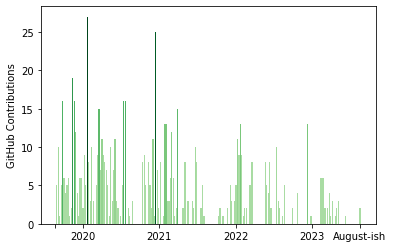

In [8]:
def date_index(date_string, dates):
    return next(i for i in range(len(dates)) if dates[i] >= date_string)

plt.bar(list(range(len(weeklyCounts))),
        weeklyCounts,
        color=matplotlib.cm.get_cmap('Greens')(
            [max(count/max_count, 0.35) for count in weeklyCounts]))
plt.ylabel("GitHub Contributions")
ticks = ([-1]
    + [date_index(datestring, dates)
       for datestring in ["2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01"]]
    + [len(weeklyCounts)-1])
labels = ["", "2020", "2021", "2022", "2023", "August-ish"]
plt.xticks(ticks=ticks,
           labels=labels)

plt.savefig("/tmp/github-contributions.png")

In [6]:
print(dates[-1])

2023-08-24
